# Лабораторная работа № 4

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random

## Генерация случайных процессов

Спектральная плотность белого шума:
$$S_{x}(\omega) = \sigma^2 = \phi(i \omega) \phi(-i \omega)$$
$$\phi(i \omega) = \sigma$$

Заданная автокорреляционная функция:
$$R_{y}(\tau) = D e^{-\alpha|\tau|}(1 - \alpha|\tau|)$$
Спектральная плотность случайного процесса с заданной автокореляционной функцией:
$$S_{y}(\omega) = \int_{-\infty}^{+\infty} R_{y}(\tau)e^{-i\omega\tau} \,d\tau =
\int_{-\infty}^{+\infty} D e^{-\alpha|\tau|}(1 - \alpha|\tau|)e^{-i\omega\tau} \,d\tau =
\frac{4 \alpha D \omega^2}{(\alpha^2 + \omega^2)^2}$$
$$S_{y}(\omega) = \frac{4 \alpha D \omega^2}{(\alpha^2 + \omega^2)^2} = 
\frac{2 \sqrt{\alpha D} \omega}{(\alpha + i \omega)^2} \frac{2 \sqrt{\alpha D} \omega}{(\alpha - i \omega)^2} =
\psi(i \omega) \psi(-i \omega)$$
$$\psi(i \omega) = \frac{2 \sqrt{\alpha D} \omega}{(\alpha + i \omega)^2}$$
Частотная характеристика:
$$W(i \omega) = \frac{\psi(i \omega)}{\phi(i \omega)} =
\frac{2 \sqrt{\alpha D} \omega}{\sigma(\alpha + i \omega)^2}$$
Импульсная характеристика:
$$h(\tau) = L^{-1} \{W(i \omega)\} = \frac{2 \sqrt{\alpha D}}{\sigma} e^{-\alpha \tau} (1 - \alpha \tau)$$

Случайный процесс в дискретном виде:
$$y_{j} = \Delta \tau \sum_{i = 0}^{N} h(i \Delta \tau) x_{i - j}$$

In [2]:
def generate_sequence(generator, n):
    return [value for value in generator(n)]


def shaping_filter(seq_x, h, delta_t):
    for j in range(len(seq_x)):
        yield delta_t * sum(h(i * delta_t) * seq_x[j - i] for i in range(j + 1))

        
def generate_white_noise(n):
    return np.random.uniform(-math.sqrt(3), math.sqrt(3), n)


def stochastic_process_generator(n, h, delta_t):
    seq_x = generate_white_noise(n)
    return shaping_filter(seq_x, h, delta_t)

In [3]:
def _r(t, d, a):
    return d * math.exp(-a * abs(t)) * (1 - a * abs(t))


def _h(t, d, a):
    return 2 * math.sqrt(d * a) * math.exp(-a * t) * (1 - a * t)


init_values = {
    'd': 1,
    'a': 1,
}


def r(t):
    return _r(t, d=init_values['d'], a=init_values['a'])


def h(t):
    return _h(t, d=init_values['d'], a=init_values['a'])


def generate_stochastic_process(n, delta_t):
    return [value for value in stochastic_process_generator(n, h, delta_t)]

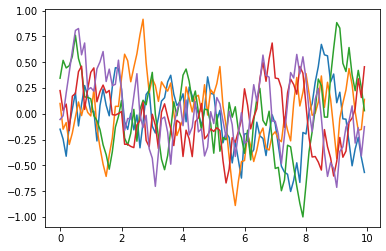

In [4]:
n = 100
delta_t = 0.1
seq_t = np.arange(0, n * delta_t, delta_t)
for _ in range(5):
    stochastic_process = generate_stochastic_process(n, delta_t)
    plt.plot(seq_t, stochastic_process)
plt.show()

## Исследование случайных процессов

In [5]:
n = 100
delta_t = 0.5
seq_t = np.arange(0, n * delta_t, delta_t)
stochastic_processes = np.array([generate_stochastic_process(n, delta_t) for _ in range(10)])

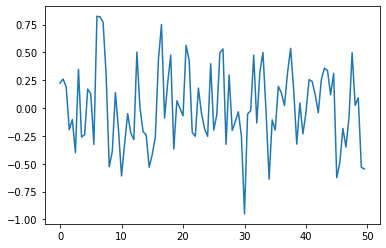

Среднее значение мат ожиданий для всех t:  0.008545808066956307


In [6]:
exp_values = []
for i in range(len(seq_t)):
    exp_values.append(np.mean(stochastic_processes[:, i]))
plt.plot(seq_t, exp_values)
plt.show()
print('Среднее значение мат ожиданий для всех t: ', np.mean(exp_values))

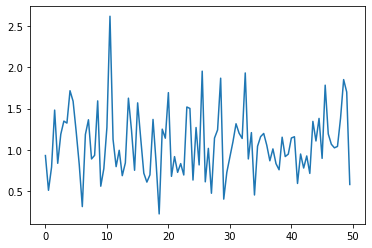

Среднее значение дисперсий для всех t:  1.0729543861903048


In [7]:
variances = []
for i in range(len(seq_t)):
    variances.append(np.var(stochastic_processes[:, i]))
plt.plot(seq_t, variances)
plt.show()
print('Среднее значение дисперсий для всех t: ', np.mean(variances))

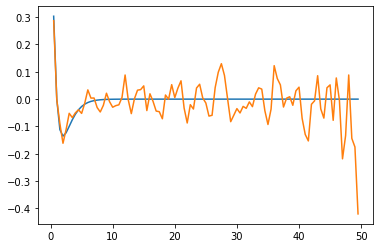

In [8]:
seq_t = seq_t[1:]
theor_autocorrelations = [r(cnt * delta_t) for cnt in range(1, n)]
autocorrelations = []
for cnt in range(1, n):
    correlations = []
    for i in range(n - cnt):
        x_t1, x_t2 = stochastic_processes[:, i], stochastic_processes[:, i + cnt]
        correlations.append(np.mean(x_t1 * x_t2) - np.mean(x_t1) * np.mean(x_t2))
    autocorrelations.append(np.mean(correlations))

plt.plot(seq_t, theor_autocorrelations)
plt.plot(seq_t, autocorrelations)
plt.show()